<h1>Problem Set 2</h1>
<p>
MACS 30100, Dr. Evans <br>
William L. Guzman     <br> Monday, January 23 
</p>

<h2>Part 1: Some income data, lognormal distribution, and hypothesis testing (6
points).</h2>

<h3>(a) Plot a histogram of percentages of the income.txt data with 30 bins.</h3>

<IPython.core.display.Javascript object>


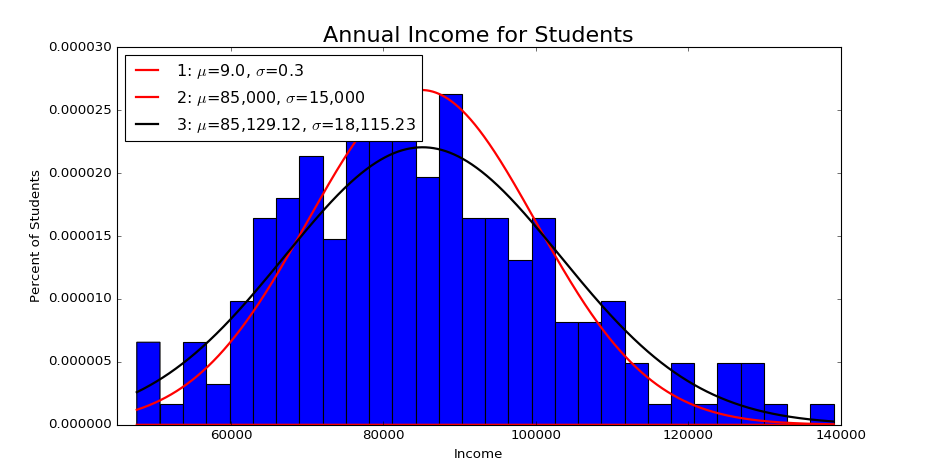

(45000, 140000)

In [1]:
#Import Main Libraries
import scipy.optimize as opt
import os 
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib notebook

#Change working directory
os.chdir("/home/william/Documents/MACS30100/") 

#Import data using numpy
incomes = np.loadtxt("incomes.txt")

#Plot the histogram with the data in 30 bins.
count, bins, ignored = plt.hist(incomes, 30, normed=True)
plt.title('Annual Income for Students', fontsize=20)
plt.xlabel('Income')
plt.ylabel('Percent of Students')
plt.xlim([45000, 140000]) 


<h3>Fig. 1: Student annual income</h3>
<p> In this histogram, we can observe the annual income of the students from the MACS program from the year 2018 to 2020. We can observe that the data is a little skewed to the right. 
</p>
<h3>Fig. 2: Normal PDF Plot</h3>
<p>After ploting the normal pdf with the values, it's clear that the values do not fit the histogram with the annual income data.  
</p>
<h>Fig. 3: Estimate values line plot.</h3>
<p>After looking the histogram and using some preliminaries values for estimating the best fit line, we can see that the curve it's a better fit with the values estimated.</p>
<h3>Fig. 4: MLE Estimated PDF</h3>
<p>After ploting the estimated PDF curve, we can see that it's the better fit for the histogram.</p>

<h3>(b) Plot the lognormal PDF f (x|μ = 9.0, σ = 0.3) for 0 ≤ x ≤ 150,000.</h3>

In [2]:
#Create and find the normal PDF function with the values mu = 9.0 && sigma = 150,000.
def norm_pdf(xvals, mu, sigma, cutoff):
    
    if cutoff == 'None':
        prob_notcut = 1.0
    
    else:
        prob_notcut = sts.norm.cdf(cutoff, loc=mu, scale=sigma)
            
        pdf_vals    = ((1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (xvals - mu)**2 / (2 * sigma**2))) /
                      prob_notcut)
    
    return pdf_vals

#Plot the line of the normal pdf. 
dist_incomes = np.linspace(min(incomes),max(incomes),140000)

mu_1  = 9
sig_1 = 0.3

plt.plot(dist_incomes, norm_pdf(dist_incomes, mu_1, sig_1, 140000),
        linewidth=2, color='r', label='1: $\mu$=9.0, $\sigma$=0.3')

plt.legend(loc='upper left')

In [3]:
#Find the log likelihood values.
def log_lik_norm(xvals, mu, sigma, cutoff):
    
    pdf_vals = norm_pdf(xvals, mu, sigma, cutoff)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

print('Log Likelihood: ', log_lik_norm(incomes, mu_1, sig_1, 140000))


Log Likelihood:  -inf


/home/william/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log


<h3>Log Likelihood: -∞ </h3>


<h3>(c) Estimate the parameters of the lognormal distribution by maximum likelihood and plot its PDF</h3>
<p>Using estimated values of μ = 85,000 and σ = 15,000 by looking at the histogram.<p>

In [4]:
#Using the criterion function. 
def crit(params, *args):
    
    mu, sigma = params
    xvals, cutoff = args
    log_lik_val = log_lik_norm(xvals, mu, sigma, cutoff)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

#Using the estimate values for the crit function.
mu_init  = 85000   # estimate mu
sig_init = 15000   # estimate sigma
params_init = np.array([mu_init, sig_init])
mle_args = (incomes, 140000)
results = opt.minimize(crit, params_init, args=(mle_args))
mu_MLE, sig_MLE = results.x

print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)

#Log Likelihood value with predicted values
print('Log Likelihood with estimated values: ', log_lik_norm(incomes, mu_init, sig_init, 140000))

#Ploting the new MLE values with the estimated values.
plt.plot(dist_incomes, norm_pdf(dist_incomes, mu_init, sig_init, 140000),
        linewidth=2, color='r', label='2: $\mu$=85,000, $\sigma$=15,000')

plt.plot(dist_incomes, norm_pdf(dist_incomes, mu_MLE, sig_MLE, 140000),
         linewidth=2, color='k', label='3: $\mu$=85,129.12, $\sigma$=18,115.23')

plt.legend(loc='upper left')

#Log likelihood Estimate
print('MLE Log Likelihood: ', log_lik_norm(incomes, mu_MLE, sig_MLE, 140000))

#Variance and Covarinace Matrix
results
vcv_mle = results.hess_inv
stderr_mu_mle = np.sqrt(vcv_mle[0,0])
stderr_sig_mle = np.sqrt(vcv_mle[1,1])

print('VCV(MLE) = ', vcv_mle)
print('Standard error for mu estimate = ', stderr_mu_mle)
print('Standard error for sigma estimate = ', stderr_sig_mle)




mu_MLE= 85129.129431  sig_MLE= 18115.232561
Log Likelihood with estimated values:  -2250.838985
MLE Log Likelihood:  -2243.10055083
VCV(MLE) =  [[   1549.07809222   37345.90122437]
 [  37345.90122437  900935.09769863]]
Standard error for mu estimate =  39.3583293881
Standard error for sigma estimate =  949.176009863


<h3>MLE Log Estimates</h3>
<p>-2243.10055</p>

<h3>MLE Estimates</h3>
<p>mu_MLE = 85129.129 and sig_MLE = 18115.2325</p>

<h3>Variance and Co-Variance Matrix.</h3>
<p>[1549.078, 37345.901] <br>
   [37345.90, 900935.098]<p>
   
<h3>Standard errors for estimates.</h3>
<p>mu = 39.3583 and sigma = 949.18<p>
   


<h3>(d) Perform a likelihood ratio test</h3>

In [5]:
#Using a ratio test.
log_lik_h0 = log_lik_norm(incomes, mu_init, sig_init, 140000)
log_lik_mle = log_lik_norm(incomes, mu_MLE, sig_MLE, 140000)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)

print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)


chi squared of H0 with 2 degrees of freedom p-value =  0.000435753356393


<h3>(e) Predict my income with my estimates. </h3>

In [6]:
#Using tow standard error to create hypothesis. 

lb_mu_95pctci = mu_MLE - 2 * stderr_mu_mle
print('mu_2=', mu_init, ', lower bound 95% conf. int.=', lb_mu_95pctci)

lb_sig_95pctci = sig_init - 2 * stderr_sig_mle
print('sig_2=', sig_init, ', lower bound 95% conf. int.=', lb_sig_95pctci)

mu_2= 85000 , lower bound 95% conf. int.= 85050.4127722
sig_2= 15000 , lower bound 95% conf. int.= 13101.6479803


<p>With 95% level of confidence, I can predict that my income after graduating will be in the range of 71,948.72 and $98,152.052. Therefore, therefore, the probaibility I will earn more than 100,000 is less than .05 and the probability that I will earn less than 75,000 is around 0.15. </p>

<h2>Part 2: Linear regression and MLE (4 points)</h2>
<h3>(a) Estimate the parameters of the model (β 0 , β 1 , β 2 , σ 2 ) by maximum likeli-
hood</h3>

In [7]:
#Part 2: 
import pandas as pd
import pylab  as pl 

#Import data 
sick = pd.read_csv("sick.csv")

#Using R to do linear regresion and detrminte betas
age = 1.293e-02
child = 4.005e-01
temp = -9.992e-03

#Interceptor and sigma
intercept = 2
sigma_R = 9

#Setting the log Likelihood
print('Log Likelihood: ', log_lik_norm(sick, intercept,sigma_R, 200))












Log Likelihood:  sick              -624.758354
age              -2626.675365
children          -624.518292
avgtemp_winter   -2956.694740
dtype: float64
